In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV



In [2]:
df=pd.read_csv("secom_rf.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.212406,-0.330435,0.50,1.962264,1.638889,0.375,-0.078431,-2.545642,-1.569231,...,-0.663565,0.732305,0.625072,-0.285223,0.129719,-2.466145,-0.251416,-0.373801,-0.957169,-0.421141
1,0,0.933964,-1.321739,-1.00,-1.088534,1.555556,0.250,-0.078431,0.796287,-0.246154,...,-0.725669,0.092770,0.267370,-0.513746,-0.052275,-1.195242,-0.113250,-0.968189,1.900498,-0.265101
2,0,-0.257246,-0.321739,-0.50,-1.011611,1.166667,0.375,0.745098,-0.498195,-0.230769,...,-1.160797,-1.907230,-0.787461,0.929553,-1.854792,1.513788,0.475651,0.168939,-0.887422,-0.327181
3,0,0.226982,-0.660870,1.00,1.013062,1.555556,0.250,-0.078431,-0.824136,-0.692308,...,-1.318298,-1.825834,-0.179105,-0.529210,-0.164569,0.503754,-0.260476,0.037943,0.297121,-0.280201
4,0,-0.729791,0.443478,-0.50,0.387518,1.361111,0.750,0.078431,-2.682826,0.307692,...,-1.155706,1.011375,0.230816,0.115120,-1.471442,0.584022,0.323896,-1.045228,0.363048,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.50,0.767779,-0.194444,0.625,-0.431373,-1.112945,0.100000,...,0.360869,-0.089400,-0.643857,0.809278,0.021297,-0.191898,-0.480181,-0.982760,-1.714807,-0.577181
1563,1,0.457747,-0.539130,2.50,-0.635704,1.055556,0.625,-0.470588,-0.846828,0.538462,...,0.381210,9.216801,-0.395816,2.130584,0.168441,0.456932,0.169875,-0.162880,1.015825,-0.671141
1564,1,-0.667594,-0.373913,0.00,-0.341074,-0.361111,-0.500,0.431373,-0.157813,0.930769,...,0.073369,-0.050640,-0.578583,0.728522,0.040658,0.831514,-0.070215,0.615163,2.276824,0.500000
1565,1,1.795160,-0.530435,0.75,0.557329,0.416667,-0.750,0.666667,-1.129448,0.930769,...,2.833710,0.666414,-0.544641,-0.587629,0.363988,0.309774,-1.832390,-1.297410,-1.327305,0.686242


In [4]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

In [6]:
from sklearn.model_selection import train_test_split

## SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 165) (1096,)

오버샘플링 후 : (2046, 165) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1023
0    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


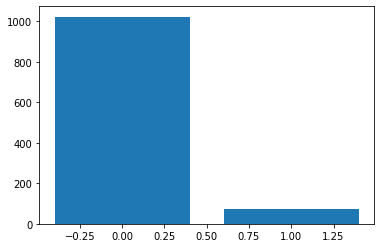

In [8]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


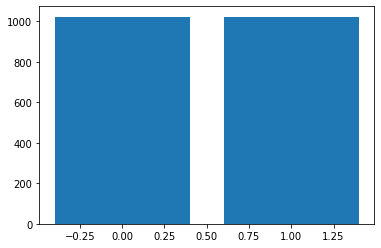

In [9]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
x_train_over

,v0,v10,v100,v102,v103,v104,v106,v107,v11,v114,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0.343366,0.391304,0.000000,0.152395,-1.361111,1.000000,1.137255,-0.738525,0.861538,0.0,...,-0.428074,-0.701803,0.021939,-0.451890,0.193611,-0.205276,1.080408,0.245113,0.865709,-0.983221
1,0.906481,-0.408696,-0.250000,1.847605,-0.305556,0.500000,-0.823529,-0.174317,-0.015385,0.0,...,-0.340757,-1.035137,-0.669967,-0.305842,0.606002,0.416798,-1.329558,0.639111,0.341125,-0.562081
2,-0.337691,0.478261,-1.000000,-0.211901,-1.388889,0.625000,-0.627451,-0.230015,0.969231,0.0,...,0.293107,0.197422,-0.320098,0.309278,0.445305,-1.028018,2.724802,-0.078627,0.079886,-0.624161
3,-1.402392,-0.573913,-0.750000,0.573295,-1.055556,0.000000,-0.588235,1.817432,0.784615,0.0,...,4.482161,-0.628160,-0.474145,0.345361,-0.712488,0.697734,0.314836,0.482147,0.322729,-0.015101
4,0.654131,-0.608696,0.750000,0.120464,0.472222,-0.125000,0.823529,-0.064982,0.576923,0.0,...,-0.915013,1.026879,-0.202604,0.451890,1.053243,-0.031363,-0.158550,0.337589,1.241406,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,-0.395013,0.375856,1.204716,-0.510650,0.111042,-0.015199,-0.602737,0.342488,-0.087002,0.0,...,-0.042462,0.416986,1.054534,-0.573234,-0.662460,0.965377,-0.755045,1.199686,0.625099,0.019677
2042,-1.065365,-0.900569,-0.065713,-0.885733,1.575001,0.024642,0.557083,0.561636,-1.725144,0.0,...,-0.385427,-0.894131,-1.624273,-0.634148,-1.753837,-0.215403,-0.862391,-0.271356,0.471702,-0.065393
2043,0.840955,0.771196,0.379486,-0.439670,0.643092,0.639427,-0.059831,-0.219884,0.389249,0.0,...,1.465907,0.629075,1.219895,0.061725,0.626540,1.558864,-0.360405,-0.414143,0.783666,-0.690130
2044,-0.752992,0.612599,0.172901,1.107059,1.105938,-0.240649,-1.705734,0.139105,-0.145190,0.0,...,-0.677342,0.148169,1.142334,-0.369288,0.528939,-1.917435,-0.310783,-0.218856,0.571451,0.118362


In [11]:
pd.DataFrame(X_test)

,v0,v10,v100,v102,v103,v104,v106,v107,v11,v114,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
955,-0.677274,0.095652,0.00,-0.371553,-0.777778,0.250,-0.784314,0.267148,0.753846,0.0,...,-0.494726,0.096646,-0.957173,0.302405,0.588577,0.951915,-0.049830,0.651374,-0.911668,-0.265101
1174,-0.324562,-0.939130,0.25,-0.124819,0.666667,1.250,0.156863,-0.958226,1.023077,0.0,...,0.000000,-0.275447,2.181208,0.702749,0.139400,2.436865,0.131370,-1.196422,-0.589879,-1.233221
821,2.064979,1.269565,0.25,-0.786647,-0.944444,-0.125,-0.627451,-0.386797,1.046154,0.0,...,0.811948,-1.287075,-1.066834,0.228522,-0.259439,-0.098252,-0.095130,0.335714,-0.653342,0.171141
1095,-0.802337,0.513043,-1.00,-0.502177,-1.305556,0.125,-0.549020,0.340382,0.546154,0.0,...,-0.008910,0.216801,1.672069,0.261168,0.071636,1.801413,0.428086,0.496285,-0.122017,-0.109060
35,0.104812,0.765217,-0.75,-0.590711,0.527778,0.375,0.549020,0.566271,-0.900000,0.0,...,-0.049374,0.007499,-1.001560,0.156357,0.127783,0.691045,0.747452,-0.140374,-0.619222,-0.374161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.844451,-1.052174,-0.50,-0.044993,1.166667,0.250,0.509804,0.009283,0.300000,0.0,...,-0.153534,0.259437,0.606795,-0.422680,-0.305905,-0.305610,0.197055,-0.877444,-0.178829,-0.203020
641,0.378748,-0.704348,-0.25,0.081277,-0.194444,-0.500,0.156863,-0.027849,0.569231,0.0,...,-0.950702,-0.814206,0.063714,-1.003436,-1.484995,-0.272165,-0.312571,0.285652,0.376702,0.483221
216,-2.120834,-0.200000,0.75,-0.802612,0.944444,0.375,1.294118,-0.247550,-1.330769,0.0,...,-0.915570,0.604398,0.706012,0.111684,0.367861,-0.533035,0.496036,-0.814975,0.164869,-0.436242
1062,-0.443282,0.295652,0.00,0.002903,0.444444,0.625,-0.078431,0.000000,1.038462,0.0,...,0.851312,0.433856,0.507579,-0.048110,-0.079380,-0.118319,-0.240091,-0.290413,0.998455,0.000000


In [12]:
x_train_over = pd.DataFrame(x_train_over)
y_train_over=pd.DataFrame(y_train_over)

In [16]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
param_grid = {
    'max_depth' : range(3,5),
    'n_estimators' : range(5,10,50),
    'max_features' : range(1,4)
}

grid_search = GridSearchCV(tree, param_grid, cv=5)

grid_search.fit(x_train_over, y_train_over.values.ravel())
print('최적 하이퍼 파라미터: ', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 4, 'max_features': 3, 'n_estimators': 5}
최고 예측 정확도: 0.7918


In [18]:
evals = [(X_test, y_test)]
random = RandomForestClassifier(**grid_search.best_params_)
random.fit(x_train_over, y_train_over)

preds = random.predict(X_test) 

C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
y_pred= grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       440
           1       0.13      0.45      0.20        31

    accuracy                           0.77       471
   macro avg       0.54      0.62      0.53       471
weighted avg       0.90      0.77      0.82       471



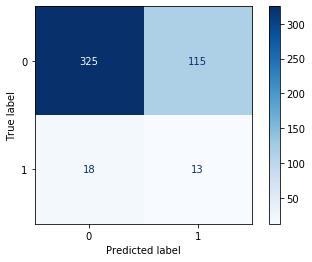

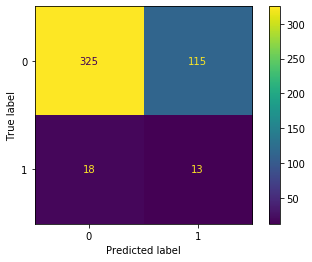

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[325 115]
 [ 18  13]]
trainset 정확도:  0.8426197458455523
testset 정확도:  0.7176220806794055
accuracy=  0.7176220806794055
precision=  0.1015625
recall=  0.41935483870967744
f1 score=  0.16352201257861634
교차 검증=  0.9341993281075028
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       440
           1       0.10      0.42      0.16        31

    accuracy                           0.72       471
   macro avg       0.52      0.58      0.50       471
weighted avg       0.89      0.72      0.79       471



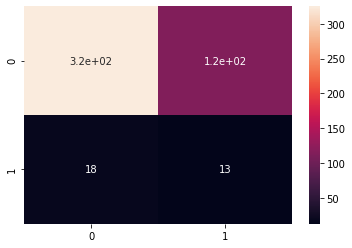

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',random.score(x_train_over,y_train_over)) #trainset 정확도
print('testset 정확도: ',random.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(random,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

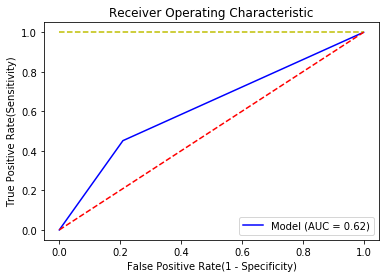

In [26]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, pred_c)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

#roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
#roc_auc = metrics.roc_auc_score(y1_test,pred_c)
roc_auc = metrics.roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [439]:
print('test accuracy : ', grid_search.score(X_test, y_test))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.7346072186836518
parameters :  {'max_depth': 4, 'max_features': 2, 'n_estimators': 5}


In [440]:
print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(x_train_over, y_train_over))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(X_test, y_test))

학습용 데이터셋 정확도 : 0.81
검증용 데이터셋 정확도 : 0.73


In [441]:
from sklearn.metrics import classification_report
y_pred=grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       440
           1       0.12      0.48      0.19        31

    accuracy                           0.73       471
   macro avg       0.54      0.62      0.52       471
weighted avg       0.90      0.73      0.80       471



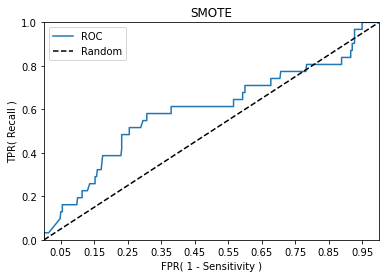

In [442]:
def roc_curve_plot(y_test , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('SMOTE')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(y_test, grid_search.predict_proba(X_test)[:, 1] )

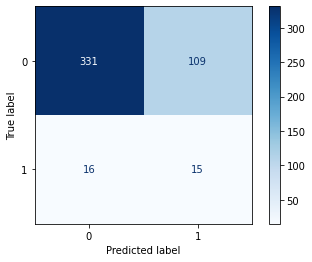

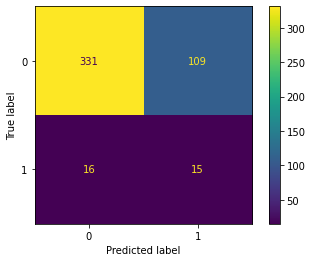

In [443]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [27]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({0: 1023, 1: 1015})
오버샘플링 전 : (1096, 165) (1096,)

오버샘플링 후 : (2038, 165) (2038,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1015
dtype: int64


In [28]:
y_res=pd.DataFrame(y_res)
X_res=pd.DataFrame(X_res)

In [29]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
param_grid = {
    'max_depth' : range(3,5),
    'n_estimators' : range(5,10,50),
    'max_features' : range(1,4)
}

grid_search = GridSearchCV(tree, param_grid, cv=5)

grid_search.fit(X_res, y_res.values.ravel())
print('최적 하이퍼 파라미터: ', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 4, 'max_features': 3, 'n_estimators': 5}
최고 예측 정확도: 0.7630


In [31]:
evals = [(X_test, y_test)]
random = RandomForestClassifier(**grid_search.best_params_)
random.fit(X_res, y_res)

preds = random.predict(X_test) 

C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
y_pred= grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       440
           1       0.20      0.58      0.30        31

    accuracy                           0.82       471
   macro avg       0.58      0.71      0.60       471
weighted avg       0.92      0.82      0.86       471



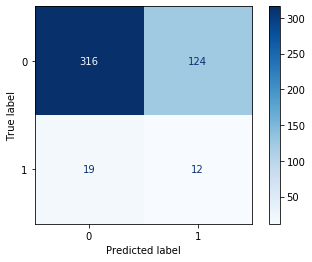

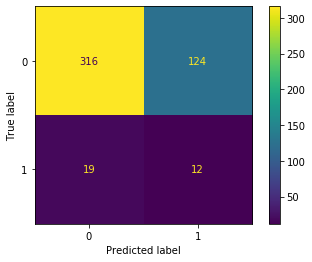

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[316 124]
 [ 19  12]]
trainset 정확도:  0.821603128054741
testset 정확도:  0.6963906581740976
accuracy=  0.6963906581740976
precision=  0.08823529411764706
recall=  0.3870967741935484
f1 score=  0.1437125748502994
교차 검증=  0.9341993281075028
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       440
           1       0.09      0.39      0.14        31

    accuracy                           0.70       471
   macro avg       0.52      0.55      0.48       471
weighted avg       0.89      0.70      0.77       471



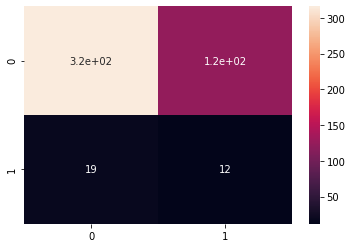

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',random.score(x_train_over,y_train_over)) #trainset 정확도
print('testset 정확도: ',random.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(random,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

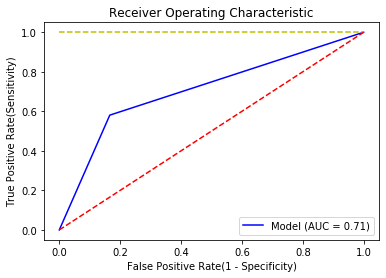

In [35]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, pred_c)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

#roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
#roc_auc = metrics.roc_auc_score(y1_test,pred_c)
roc_auc = metrics.roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [447]:
print('test accuracy : ', grid_search.score(X_test, y_test))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.7813163481953291
parameters :  {'max_depth': 4, 'max_features': 3, 'n_estimators': 5}


In [448]:
print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(X_res, y_res))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(X_train, y_train))

학습용 데이터셋 정확도 : 0.87
검증용 데이터셋 정확도 : 0.83


In [449]:
from sklearn.metrics import classification_report
y_pred=grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       440
           1       0.12      0.35      0.18        31

    accuracy                           0.78       471
   macro avg       0.53      0.58      0.52       471
weighted avg       0.89      0.78      0.83       471



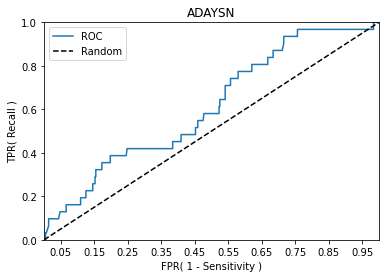

In [450]:
def roc_curve_plot(y_test , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('ADAYSN')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(y_test, grid_search.predict_proba(X_test)[:, 1] )

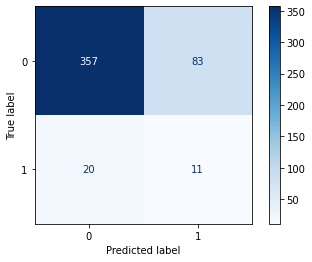

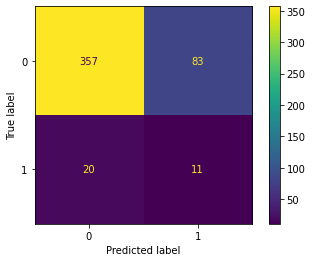

In [451]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()